In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# We don't know the no. of clusters. So let's use K-Means and elbow method to choose this number of optimal clusters.
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Univ = pd.read_csv('/content/Universities.csv')
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
# Normalization / Standardisation function
from sklearn.preprocessing import StandardScaler  # built in function for standardization
scaler = StandardScaler()  # scaler is an object name of StandardScalar class, you can give any name
scaled_univ_df = scaler.fit_transform(Univ.iloc[:,1:])   # fit_transform() is a method of StandardScalar class
scaled_univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

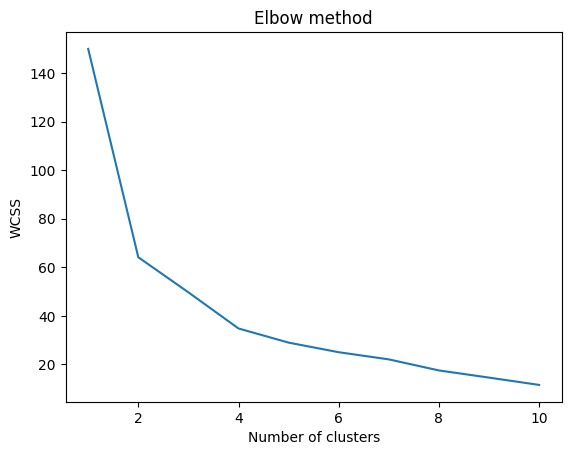

In [ ]:
# Inertia measures how well a dataset was clustered by K-Means.
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance,
# and summing these squares across one cluster.
# A good model is one with low inertia AND a low number of clusters (K).


# To plot the elbow method graph, we need to compute the WCSS (Within Cluster Sum of Squares)
# Let us say max. no. of clusters could be 10.
# As we are going to have 10 iterations we are going to write a for loop to create a list of 10 WCSS for the no. of clusters

wcss = []  # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
  kmeans.fit(scaled_univ_df) #  use fit method to fit the kmeans object to our scaled dataframe\
  wcss.append(kmeans.inertia_) # another name for wcss is inertia.
    # In WCSS list we will append all distances i.e if cluster is 10 what is the value,
    # if 9 what is value and so on upto 1.

plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#init='k-means++': init is random initialization method. We can choose random if choice of initial centroid is to be random.
# But as we don't want to fall into random initialization, we are going to use this initialization method.
# ‘k-means++’ : selects initial cluster centroids using sampling, based on an empirical probability distribution of the points’.
# It makes several trials at each sampling step and selects the best centroid among them.
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#:~:text=init%7B'k%2Dmeans%2B%2B,contribution%20to%20the%20overall%20inertia.
# max_iter=300: Suppose dataset has 200 data points. We will make 10 clusters of 20 points each in 1st iteration. Such how many combinations you can form for data points?
# so default value is 300. so we will keep it as it is.
# random_state=0: Use an int to make the randomness deterministic i.e. same results every time. It determines random number generation for centroid initialization.



In [ ]:
# Lower WCSS means points are closer to their cluster centers (i.e., more compact clusters).
# In above graph As k increases, WCSS always decreases, because:
# More clusters = points are closer to their centroids
# BUT after a certain point, the rate of decrease slows down — this is the elbow.
# The "elbow point" is where the curve bends —
# and adding more clusters beyond this point gives diminishing returns.
# Here, the elbow is at k=3 — beyond that, WCSS reduces only slightly.

In [ ]:
wcss

[149.99999999999997,
 64.1452839501027,
 49.69054164653248,
 34.79612750585773,
 28.968669047324088,
 25.012005085561192,
 22.058835963741735,
 17.503463690174225,
 14.550294568354763,
 11.53464175417217]

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0) # pass no. of clusters as 4
predict = kmeans.fit_predict(scaled_univ_df) # assign cluster numbers to universities

In [ ]:
predict


array([3, 2, 1, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 0, 3, 0, 3, 0, 1, 1, 0, 1,
       1, 0, 3], dtype=int32)

In [ ]:
kmeans.labels_

array([3, 2, 1, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 0, 3, 0, 3, 0, 1, 1, 0, 1,
       1, 0, 3], dtype=int32)

In [ ]:
cluster_new = KMeans(n_clusters=3,random_state=0)
new_predict = cluster_new.fit_predict(scaled_univ_df)

In [ ]:
cluster_new.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1], dtype=int32)

In [ ]:
new_predict

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1], dtype=int32)

In [ ]:
#Assign clusters to the data set
#Univ['clusterid_new'] = clusters_new.labels_
Univ['cluster_new'] = new_predict

In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [ ]:
Univ.groupby('cluster_new').mean('numeric_only')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster_new,,,,,,
0,1085.200000,44.000000,69.600000,18.600000,11056.400000,74.400000
1,1306.388889,84.277778,31.277778,11.777778,28175.111111,90.444444
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


In [ ]:
Univ[Univ['cluster_new']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_new
13,PennState,1081,38,54,18,10185,80,0
15,Purdue,1005,28,90,19,9066,69,0
17,TexasA&M,1075,49,67,25,8704,67,0
20,UMichigan,1180,65,68,16,15470,85,0
23,UWisconsin,1085,40,69,15,11857,71,0


In [ ]:
Univ[Univ['cluster_new']==0].shape[0]

5

In [ ]:
Univ[Univ['cluster_new']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_new
0,Brown,1310,89,22,13,22704,94,1
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,1
10,MIT,1380,94,30,10,34870,91,1
11,Northwestern,1260,85,39,11,28052,89,1


In [ ]:
Univ[Univ['cluster_new']==1].shape[1]

8

In [ ]:
Univ[Univ['cluster_new']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_new
1,CalTech,1415,100,25,6,63575,81,2
9,JohnsHopkins,1305,75,44,7,58691,87,2
